# Algorithm Evaluation
Find the best model for the given data

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

### Add root directory path
Has to be added to access the utils file in the main root directory

In [2]:
import sys
import os

# system path manipulation to include the root directory
# This is necessary to import modules from the root directory
# os.path.abspath("..") gets the absolute path of the parent directory
# sys.path is a list of strings that specifies the search path for modules
# os is used to handle file paths in a platform-independent way
sys.path.append(os.path.abspath(".."))  # Add root directory path

In [3]:
from utils import *  # Import all functions from utils module

### Step 1 - Data Ingestion

In [4]:
import pandas as pd

df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


 Target Feature - Loan_Status
 1. 0 --> Rejected
 2. 1 --> Approved

In [5]:
df["loan_status"].unique()

array([0, 1])

In [6]:
a = df["loan_status"].value_counts()
a

loan_status
0    50295
1     8350
Name: count, dtype: int64

<Axes: title={'center': 'Loan Status Distribution'}, xlabel='Loan Status', ylabel='Count'>

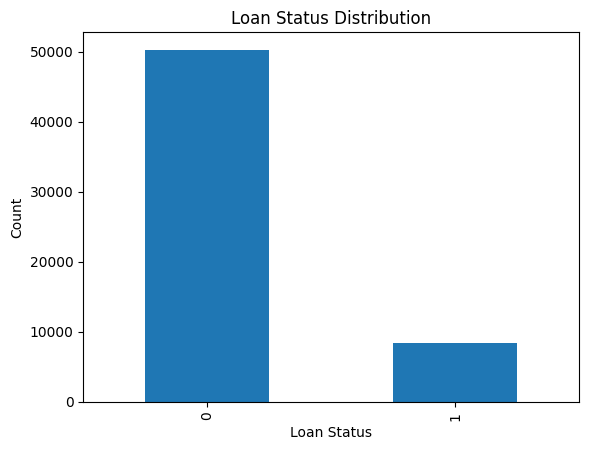

In [7]:
a.plot(
    kind="bar", title="Loan Status Distribution", xlabel="Loan Status", ylabel="Count"
)

### Step 2 - Data Quality Checks

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [9]:
m = df.isna().sum()
m

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Separate X & Y

In [11]:
X = df.drop(columns=["id", "loan_status"])
Y = df["loan_status"]

In [12]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [13]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

### Step 4 - Preprocessing on X

In [14]:
X.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [15]:
from utils import preprocess_data

In [16]:
X_pre, pre = preprocess_data(X)
X_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

### Step 5 - Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
xtrain.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14337,36,50000,RENT,0.0,HOMEIMPROVEMENT,C,7200,13.85,0.14,Y,15
17117,27,43200,RENT,3.0,DEBTCONSOLIDATION,C,5000,11.66,0.12,Y,9
32590,25,70000,MORTGAGE,0.0,EDUCATION,A,8000,7.88,0.11,N,3
55811,39,75000,MORTGAGE,2.0,DEBTCONSOLIDATION,A,15000,6.54,0.20,N,11
40120,22,45600,RENT,5.0,MEDICAL,A,4000,7.66,0.09,N,2


In [20]:
xtest.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
4657,23,40000,RENT,0.0,MEDICAL,A,3700,8.00,0.09,N,4
56440,25,60000,MORTGAGE,9.0,HOMEIMPROVEMENT,A,5000,8.59,0.08,N,4
42117,32,66300,RENT,0.0,MEDICAL,B,20000,12.53,0.26,N,6
10849,22,30000,RENT,0.0,DEBTCONSOLIDATION,B,5000,10.59,0.17,N,2
39395,27,60000,RENT,1.0,MEDICAL,B,7000,12.21,0.12,N,10


In [21]:
ytrain.head()

14337    0
17117    0
32590    0
55811    0
40120    0
Name: loan_status, dtype: int64

In [22]:
ytest.head()

4657     0
56440    0
42117    1
10849    0
39395    0
Name: loan_status, dtype: int64

In [23]:
xtest.shape, xtrain.shape, ytest.shape, ytrain.shape

((11729, 11), (46916, 11), (11729,), (46916,))

### Step 6 - Model Selection

In [24]:
! uv add xgboost

Resolved 55 packages in 1ms
Audited 48 packages in 0.04ms


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
import xgboost as xgb

In [26]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    HistGradientBoostingClassifier(),
    xgb.XGBClassifier(),
]

In [27]:
from utils import algorithm_evaluation

In [28]:
best_model, res_df = algorithm_evaluation(
    models,
    xtrain,
    ytrain,
    xtest,
    ytest,
)

ValueError: could not convert string to float: 'RENT'

### Step 7 - Model Evaluation

In [ ]:
from sklearn.metrics import ConfusionMatrix

ConfusionMatrix(
    best_model,
    xtrain,
    ytrain,
    xtest,
    ytest,
    normalize="true",
    cmap="Blues",
    title="Confusion Matrix",
    xlabel="Predicted",
    ylabel="Actual",
)

In [ ]:
ypred_train = best_model.predict(xtrain)
ypred_test = best_model.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest, ypred_test))

### Step 8 - Out of Sample Prediction

In [ ]:
xnew = pd.read_csv("test_loan.csv")
xnew

pre

In [ ]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

In [ ]:
preds = best_model.predict(xnew_pre)
preds

In [ ]:
probs = best_model.predict_proba(xnew_pre)[
    :, 1
]  # Get probabilities for the positive class
probs

In [ ]:
res = xnew["id"]
res["loan_status"] = preds
res["approval_prob"] = probs.round(4)
res

In [ ]:
res["loan_status"].value_counts().plot(
    kind="bar", title="Loan Status Prediction", xlabel="Loan Status", ylabel="Count"
)

In [ ]:
res.csv.to_csv("loan_results.csv", index=False)

### Step 9 - Save and Load

In [ ]:
import joblib

joblib.dump(pre, "pre.joblib")
joblib.dump(best_model, "model.joblib")

In [ ]:
p = joblib.load("pre.joblib")
p

In [ ]:
m = joblib.load("svc.joblib")
m

In [ ]:
m.score(xtrain, ytrain), m.score(xtest, ytest)